# Azimuth confidence in cell labeling

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns 
import pegasus as pg

What is the confidence in Azimuth reference labeling of the PBMC control and depleted?
-
Focus on the majority vote parameter

In [121]:
#import the standard data, add the majority vote annotation from Azimuth 
adata = sc.read_h5ad('Azimuth_annotations/PBMC_paper_control.h5ad')
annotations = pd.read_csv('Azimuth_annotations/control_cell_labels.csv')
annotations = annotations.set_index('Unnamed: 0')
adata.obs['Azimuth'] = annotations['identities_control']
adata.obs['Azimuth'] = adata.obs['Azimuth'].replace('NK_56bright','NK_CD56bright')
#This is the experimental control 
adata = adata[adata.obs['replicate']=='Seq_rep2']
adata

View of AnnData object with n_obs × n_vars = 10184 × 22105
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'replicate', 'percent.mt', 'percent.rb', 'percent.all', 'miQC.keep', 'residuals', 'complexity', 'class', 'S.Score', 'G2M.Score', 'Phase', 'cc.difference', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.1.2', 'seurat_clusters', 'scmap_clusters', 'SCT_snn_res.1.5', 'SCT_snn_res.1.8', 'new.idents', 'ident', 'cm', 'roc', 'probs', 'deseq2', 'Azimuth'
    var: 'feature_symbol', 'SCT_features'
    obsm: 'X_HARMONY', 'X_PCA', 'X_UMAP'
    layers: 'SCT'

In [122]:
#build the cell dataframe with the metrics for comparison
counts = pd.DataFrame(adata.obs['Azimuth'].value_counts())
counts['counts'] = counts['Azimuth']
counts['probs_mean'] = adata.obs.groupby('Azimuth').probs.mean()
counts['probs_median'] = adata.obs.groupby('Azimuth').probs.median()
counts['ROC_mean'] = adata.obs.groupby('Azimuth').roc.mean()
counts['Condition'] = '10x-V3'
counts['Azimuth'] = counts.index
counts

,Azimuth,counts,probs_mean,probs_median,ROC_mean,Condition
CD4 Naive,CD4 Naive,2243,0.767535,0.778284,0.858226,10x-V3
CD4 TCM,CD4 TCM,2092,0.783242,0.793256,0.741396,10x-V3
CD14 Mono,CD14 Mono,1917,0.884520,0.896963,0.961398,10x-V3
NK,NK,1361,0.795405,0.799811,0.889052,10x-V3
CD4 TEM,CD4 TEM,527,0.735265,0.753725,0.316888,10x-V3
B naive,B naive,390,0.786747,0.788144,0.917949,10x-V3
CD8 Naive,CD8 Naive,298,0.784817,0.791453,0.476510,10x-V3
B memory,B memory,284,0.797239,0.799196,0.700704,10x-V3
CD8 TEM,CD8 TEM,263,0.774666,0.794763,0.338403,10x-V3
MAIT,MAIT,248,0.780143,0.788229,0.818548,10x-V3


In [123]:
#import the depleted data, add the majority vote annotation from Azimuth 
data = sc.read_h5ad('Azimuth_annotations/PBMC_paper_depleted.h5ad')
annotations_dep = pd.read_csv('Azimuth_annotations/depleted_cell_labels.csv')
annotations_dep = annotations_dep.set_index('Unnamed: 0')
data.obs['Azimuth'] = annotations_dep['identities_depleted']
#This is the experimental depleted
data = data[data.obs['replicate']=='Seq_rep2']
data

View of AnnData object with n_obs × n_vars = 10110 × 22104
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'replicate', 'percent.mt', 'percent.rb', 'percent.all', 'miQC.keep', 'residuals', 'complexity', 'class', 'S.Score', 'G2M.Score', 'Phase', 'cc.difference', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.1.2', 'seurat_clusters', 'scmap_clusters', 'SCT_snn_res.1.5', 'sub.cluster', 'SCT_snn_res.1.8', 'new.idents', 'cm', 'roc', 'probs', 'deseq2', 'Azimuth'
    var: 'features', 'SCT_features'
    obsm: 'X_umap'
    layers: 'SCT'

In [124]:
#build the cell dataframe with the metrics for comparison
counts_dep = pd.DataFrame(data.obs['Azimuth'].value_counts())
counts_dep['counts'] = counts_dep['Azimuth']
counts_dep['probs_mean'] = data.obs.groupby('Azimuth').probs.mean()
counts_dep['probs_median'] = data.obs.groupby('Azimuth').probs.median()
counts_dep['ROC_mean'] = data.obs.groupby('Azimuth').roc.mean()
counts_dep['Condition'] = 'scCLEAN'
counts_dep['Azimuth'] = counts_dep.index
counts_dep

,Azimuth,counts,probs_mean,probs_median,ROC_mean,Condition
CD4 TCM,CD4 TCM,2307,0.622673,0.630973,0.830516,scCLEAN
CD4 Naive,CD4 Naive,2002,0.587337,0.593976,0.582418,scCLEAN
CD14 Mono,CD14 Mono,1853,0.831610,0.842548,0.985969,scCLEAN
NK,NK,1286,0.723377,0.725345,0.968118,scCLEAN
B naive,B naive,389,0.703583,0.706781,0.858612,scCLEAN
CD8 TEM,CD8 TEM,345,0.600698,0.622002,0.637681,scCLEAN
CD8 Naive,CD8 Naive,324,0.600982,0.612291,0.586420,scCLEAN
MAIT,MAIT,281,0.670533,0.677988,0.701068,scCLEAN
dnT,dnT,262,0.611485,0.622507,0.290076,scCLEAN
CD16 Mono,CD16 Mono,206,0.842674,0.856187,0.975728,scCLEAN


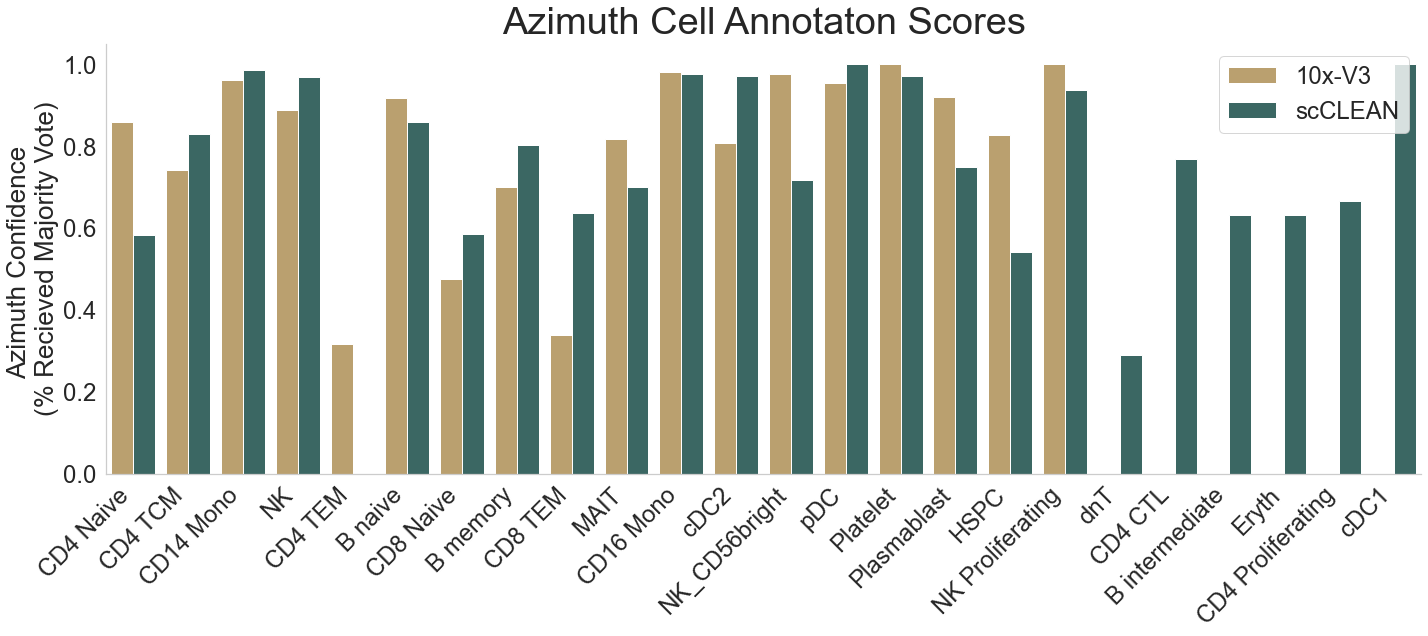

In [125]:
#merge and plot the comparison
merged = pd.concat([counts, counts_dep])
sns.set(rc={'figure.figsize':(20,9)})
sns.set_style('whitegrid', {'axes.grid' : False})

ax = sns.barplot(x='Azimuth', y='ROC_mean', hue='Condition', data=merged, palette=['#C7A462','#336F69'])
ax.spines[['right', 'top']].set_visible(False)

plt.yticks(fontsize=24)
plt.xticks(rotation = 45, ha='right', fontsize=24)
plt.xlabel('')
plt.ylabel('Azimuth Confidence \n(% Recieved Majority Vote)', fontsize=26)
plt.legend(loc='best', fontsize=24)
plt.title('Azimuth Cell Annotaton Scores', fontsize=38, pad=10)
plt.tight_layout()
#save dataframe and plot
merged.to_csv('Azimuth_annotations/Azimuth_annotations_confidence.csv')
plt.savefig('Azimuth_annotations/Azimuth_Comparison_Confidence_barplot.png', dpi=300)
